<a href="https://colab.research.google.com/github/Fawaz441/ML_tensorflow_keras/blob/master/Tensorflow_playing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [3]:
a = tf.Variable(1,name="a")
b = tf.Variable(2,name="b")

In [4]:
c = a + b
tf.print("c")

c


In [5]:
print(c)

tf.Tensor(3, shape=(), dtype=int32)


In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [7]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
x_train,x_test = np.array(x_train,np.float32),np.array(x_test,np.float32)

In [9]:
x_train,x_test = x_train.reshape([-1,784]),x_test.reshape([-1,784])

In [11]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
x_train,x_test = x_train/255.,x_test/255.

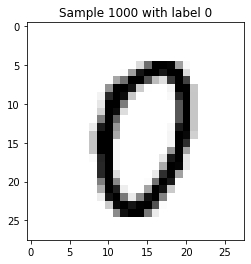

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
def display_sample(num):
  label = y_train[num]
  image = x_train[num].reshape([28,28])
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.title("Sample {} with label {}".format(num,label))
  plt.show()

display_sample(1000)

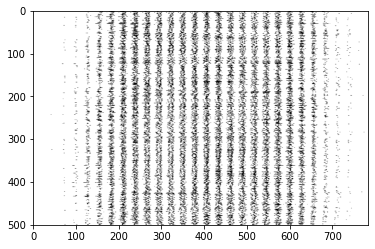

In [19]:
images = x_train[0].reshape([-1,784])
for x in range(500):
  images = np.concatenate((images,x_train[x].reshape([-1,784])))
plt.imshow(images,cmap=plt.get_cmap('gray_r'))
plt.show()

In [20]:
#setting our model parameters
learning_rate = 0.001
training_steps = 3000
num_classes = 10
num_features = 784
n_hidden = 512
display_step = 100
batch_size = 250

In [22]:
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_data = train_data.repeat().shuffle(60000).batch(batch_size).prefetch(1)

In [41]:
random_normal = tf.initializers.RandomNormal()
weights = {
    'h':tf.Variable(random_normal([num_features,n_hidden])),
    'out':tf.Variable(random_normal([n_hidden,num_classes]))
}

biases = {
    'b':tf.Variable(tf.zeros([n_hidden])),
    'out':tf.Variable(tf.zeros([num_classes]))
}

In [42]:
#creating topology
def neural_net(inputData):
  hidden_layer = tf.add(tf.matmul(inputData,weights['h']),biases['b'])
  hidden_layer = tf.nn.sigmoid(hidden_layer)

  out_layer = tf.matmul(hidden_layer,weights['out']) + biases['out']
  return tf.nn.softmax(out_layer)

In [43]:
def cross_entropy(y_pred,y_true):
  y_true = tf.one_hot(y_true,depth=num_classes)
  y_pred = tf.clip_by_value(y_pred,1e-9,1.)
  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))




In [47]:
optimizer = tf.keras.optimizers.SGD(learning_rate)
def run_optimization(x,y):
  with tf.GradientTape() as g:
    pred = neural_net(x)
    loss = cross_entropy(pred,y)
  training_variables = list(weights.values()) + list(biases.values())
  gradients = g.gradient(loss,training_variables)
  optimizer.apply_gradients(zip(gradients,training_variables))

In [48]:
def accuracy(y_pred,y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred,1),tf.cast(y_true,tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction,tf.float32),axis=-1)

In [49]:
for step, (batch_x,batch_y) in enumerate(train_data.take(training_steps),1):
    run_optimization(batch_x,batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred,batch_y)
        acc = accuracy(pred,batch_y)
        print("Training epoch: %i, Loss: %f, Accuracy: %f" %(step,loss,acc))

Training epoch: 100, Loss: 178.933472, Accuracy: 0.784000
Training epoch: 200, Loss: 118.993652, Accuracy: 0.864000
Training epoch: 300, Loss: 118.125496, Accuracy: 0.884000
Training epoch: 400, Loss: 92.209396, Accuracy: 0.884000
Training epoch: 500, Loss: 107.159996, Accuracy: 0.880000
Training epoch: 600, Loss: 81.192268, Accuracy: 0.912000
Training epoch: 700, Loss: 70.362991, Accuracy: 0.924000
Training epoch: 800, Loss: 92.483879, Accuracy: 0.892000
Training epoch: 900, Loss: 60.811623, Accuracy: 0.932000
Training epoch: 1000, Loss: 59.560852, Accuracy: 0.928000
Training epoch: 1100, Loss: 62.693607, Accuracy: 0.936000
Training epoch: 1200, Loss: 65.610100, Accuracy: 0.940000
Training epoch: 1300, Loss: 52.088852, Accuracy: 0.928000
Training epoch: 1400, Loss: 71.889099, Accuracy: 0.936000
Training epoch: 1500, Loss: 48.536591, Accuracy: 0.948000
Training epoch: 1600, Loss: 56.985790, Accuracy: 0.936000
Training epoch: 1700, Loss: 48.452530, Accuracy: 0.960000
Training epoch: 180